# ClimateBERT for TCFD and Earnings Calls Classification

### ClimateBERT (https://huggingface.co/climatebert) is a specialised language pre-trained model fine-tuned for analyzing climate-related texts. It has been employed to classify both TCFD (Task Force on Climate-related Financial Disclosures) reports and earnings calls for ST. JAMES place & Traveler Cos TRV. The classification helps in identifying and categorizing climate-related information.


## Libraries

In [1]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading and Reading Data for TCFD and Earnings Calls Classification

In [2]:
# File paths for the CSV files
tcfd_traveler_path = 'tcfd_company_csvs\Traveler_Cos_df.csv'
tcfd_st_james_path = 'tcfd_company_csvs\ST_JAMES_df.csv'
earnings_traveler_path = 'company_csvs\Travelers_Cos_df.csv'
earnings_st_james_path = 'company_csvs\St_Jamess_df.csv'

# Reading the CSV files into DataFrames
tcfd_traveler_df = pd.read_csv(tcfd_traveler_path)
tcfd_st_james_df = pd.read_csv(tcfd_st_james_path)
earnings_traveler_df = pd.read_csv(earnings_traveler_path)
earnings_st_james_df = pd.read_csv(earnings_st_james_path)

## TCFD Reports
The pre-trained model used for TCFD classification is `climatebert/distilroberta-base-climate-tcfd`. This fine-tuned ClimateBERT language model includes a classification head specifically designed to categorise climate-related paragraphs into the four TCFD recommendation categories.The model was trained on paragraphs extracted from corporate annual reports and sustainability reports. The labels used are:
- 0 -> None (i.e., not climate-related)
- 1 -> Metrics
- 2 -> Strategy
- 3 -> Risk
- 4 -> Governance

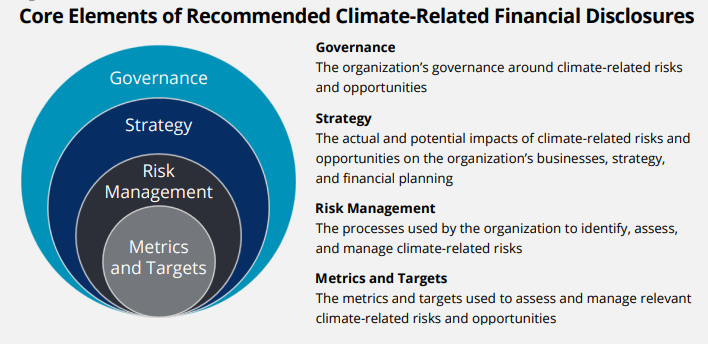

```bibtex
@techreport{bingler2023cheaptalk,
    title       = {How Cheap Talk in Climate Disclosures Relates to Climate Initiatives, Corporate Emissions, and Reputation Risk},
    author      = {Bingler, Julia and Kraus, Mathias and Leippold, Markus and Webersinke, Nicolas},
    type        = {Working paper},
    institution = {Available at SSRN 3998435},
    year        = {2023}
}

In [3]:
# Load the ClimateBERT model
model_name = "climatebert/distilroberta-base-climate-tcfd"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define the mapping of numeric labels to TCFD categories
label_mapping = {
    0: "none",
    1: "metrics",
    2: "strategy",
    3: "risk",
    4: "governance"
}

# Define a function to classify text using the ClimateBERT model
def classify_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=1).item()
    label_name = label_mapping[predicted_class_id]
    return predicted_class_id, label_name

# Apply the classification function to the 'paragraph' column
classification_results_st_james = tcfd_st_james_df['paragraph'].apply(classify_text)
classification_results_traveler = tcfd_traveler_df['paragraph'].apply(classify_text)

# Split the results into two separate columns
tcfd_st_james_df['tcfd_classification_id'] = classification_results_st_james.apply(lambda x: x[0])
tcfd_st_james_df['tcfd_classification_label'] = classification_results_st_james.apply(lambda x: x[1])

tcfd_traveler_df['tcfd_classification_id'] = classification_results_traveler.apply(lambda x: x[0])
tcfd_traveler_df['tcfd_classification_label'] = classification_results_traveler.apply(lambda x: x[1])

In [4]:
tcfd_traveler_df

,file_name,year,token,paragraph,tcfd_classification_id,tcfd_classification_label
0,cleaned_Travelers_TCFDReport2019.txt,2019,"['board', 'oversight', 'board', 'director', 'r...",Board Oversight Travelers Board of Directors a...,0,none
1,cleaned_Travelers_TCFDReport2019.txt,2019,"['catastrophe', 'rely', 'input', 'base', 'expe...",Catastrophe modeling relies upon inputs based ...,1,metrics
2,cleaned_Travelers_TCFDReport2019.txt,2019,"['expose', 'risk', 'material', 'loss', 'worker...","Moreover, Travelers is exposed to the risk of ...",2,strategy
3,cleaned_Travelers_TCFDReport2019.txt,2019,"['catastrophe', 'experience', 'catastrophe', '...",Catastrophe Experience Our catastrophe underwr...,2,strategy
4,cleaned_Travelers_TCFDReport2019.txt,2019,"['additional', 'factor', 'limit', 'exposure', ...",Additional Factors Limiting Our Exposure to C...,2,strategy
...,...,...,...,...,...,...
373,cleaned_Travelers_TCFDReport2023.txt,2023,"['underwrite', 'portfolio', 'overview', 'well'...",Underwriting Portfolio Overview To better unde...,2,strategy
374,cleaned_Travelers_TCFDReport2023.txt,2023,"['approach', 'include', 'underwriting', 'manag...",Our approach includes underwriting and pricing...,2,strategy
375,cleaned_Travelers_TCFDReport2023.txt,2023,"['addition', 'risk', 'control', 'professional'...","In addition, our Risk Control professionals pr...",1,metrics
376,cleaned_Travelers_TCFDReport2023.txt,2023,"['think', 'leadership', 'preparedness', 'renew...",Thought Leadership on Disaster Preparedness an...,2,strategy


In [5]:
tcfd_st_james_df

,file_name,year,token,paragraph,tcfd_classification_id,tcfd_classification_label
0,cleaned_sjp-tcfd-report-april2020.txt,2020,"['overall', 'relevant', 'appropriate', 'greenh...",commitment to help build a long -term future f...,2,strategy
1,cleaned_sjp-tcfd-report-april2020.txt,2020,"['expect', 'carbon', 'nature', 'certain', 'sec...","This is to be expected, due to the carbon -int...",2,strategy
2,cleaned_sjp-tcfd-report-april2020.txt,2020,"['certain', 'information', 'research', 'reprod...",Certain information 2021 MSCI ESG Research LL...,3,risk
3,cleaned_sjp-tcfd-report-april2020.txt,2020,"['track', 'focus', 'reduce', 'emission', 'asso...",On track ; future focus on reducing emissions ...,3,risk
4,cleaned_sjp-tcfd-report-april2020.txt,2020,"['forward', 'line', 'united', 'sustainable', '...",St. James s Place TCFD Report Our forward -...,3,risk
...,...,...,...,...,...,...
236,cleaned_SJP_TCFD_2023.txt,2023,"['launch', 'treasury', 'develop', 'gold', 'sta...",Taskforce (TPT)TPT was launched by HM Treasury...,2,strategy
237,cleaned_SJP_TCFD_2023.txt,2023,"['gas', 'protocol', 'streamlined', 'energy', '...",Gas Protocol and Streamlined Energy and Carbon...,3,risk
238,cleaned_SJP_TCFD_2023.txt,2023,"['responsible', 'investment', 'committee', 'ef...",At St. James s Place we formalised our Respons...,0,none
239,cleaned_SJP_TCFD_2023.txt,2023,"['actively', 'focus', 'operational', 'resilien...",We actively focus on operational resilience. O...,1,metrics


## Earnings Calls

### Climate Detection
The `climatebert/distilroberta-base-climate-detector`pre-trained model is used for detecting climate-related paragraphs in earnings calls. This model, also fine-tuned from ClimateBERT, classifies paragraphs based on whether they are related to climate or not. It was trained on texts extracted from corporate annual reports and sustainability reports with the following labels:
- 0 -> Not climate-related
- 1 -> Climate-related

```bibtex
@techreport{bingler2023cheaptalk,
    title        = {How Cheap Talk in Climate Disclosures Relates to Climate Initiatives, Corporate Emissions, and Reputation Risk},
    author       = {Bingler, Julia and Kraus, Mathias and Leippold, Markus and Webersinke, Nicolas},
    type         = {Working paper},
    institution  = {Available at SSRN 3998435},
    year         = {2023}
}

The code truncates paragraphs that exceed the model's maximum token length. This ensures the model's capabilities are not exceeded, and only appropriately sized paragraphs are classified.

In [6]:
# Load the tokenizer and model
detector_model_name = "climatebert/distilroberta-base-climate-detector"
detector_tokenizer = AutoTokenizer.from_pretrained(detector_model_name)
detector_model = AutoModelForSequenceClassification.from_pretrained(detector_model_name)

# Initialize the pipeline
detector_pipeline = pipeline("text-classification", model=detector_model, tokenizer=detector_tokenizer, truncation=True)

# Define a function to classify paragraphs, with truncation for long paragraphs
def classify_paragraph(paragraph):
    # Truncate the paragraph if it is longer than the model's max length
    max_length = detector_tokenizer.model_max_length
    tokens = detector_tokenizer.tokenize(paragraph)
    if len(tokens) > max_length:
        return 'skipped'
    result = detector_pipeline(paragraph)
    label = result[0]['label']  # Get the label directly as string
    return label

# Apply the classification to the earnings calls dataframes
def apply_climate_detector(df):
    df['climate_label'] = df['paragraph'].apply(classify_paragraph)
    # Remove rows where the classification result is 'skipped'
    df = df[df['climate_label'] != 'skipped']
    # Keep only the columns you need
    df = df[['file_name', 'date', 'token', 'paragraph', 'climate_label']]
    return df

# Apply the classification to both datasets
earnings_st_james_df = apply_climate_detector(earnings_st_james_df)
earnings_traveler_df = apply_climate_detector(earnings_traveler_df)

Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors


In [7]:
earnings_st_james_df

,file_name,date,token,paragraph,climate_label
0,cleaned_St James_s Place PLC Earnings Call 201...,2019-07-31,"['format', 'ﬁnancial', 'development', 'outlook']","Should we get started? So good morning, everyo...",no
1,cleaned_St James_s Place PLC Earnings Call 201...,2019-07-31,"['uncertainty', 'trade', 'relationship', 'weal...",So the ﬁrst six months. It's fair to say that ...,no
2,cleaned_St James_s Place PLC Earnings Call 201...,2019-07-31,"['track', 'record', 'start', 'track', 'record'...","Importantly, the continued strong retention of...",no
3,cleaned_St James_s Place PLC Earnings Call 201...,2019-07-31,"['relationship', 'introduction', 'life', 'jour...","So why is this? Well ﬁrst and foremost, St. Ja...",no
4,cleaned_St James_s Place PLC Earnings Call 201...,2019-07-31,"['bonus', 'proceed', 'disposal', 'sale', 'indi...",Where gross ﬂows can be impacted is with discr...,no
...,...,...,...,...,...
840,cleaned_St James_s Place PLC Earnings Call 202...,2024-02-28,"['conversation', 'activity', 'uncertainty', 's...",And the advisors are conﬁdent and having activ...,no
841,cleaned_St James_s Place PLC Earnings Call 202...,2024-02-28,"['suspicion', 'hope', 'expectation', 'shoot', ...",And my personal suspicion is rates will come d...,yes
842,cleaned_St James_s Place PLC Earnings Call 202...,2024-02-28,"['piece', 'complaint', 'report', 'account', 'c...","Craig, on the miscellaneous costs and the gest...",no
843,cleaned_St James_s Place PLC Earnings Call 202...,2024-02-28,"['oﬀ', 'hour', 'chat']","Craig, thank you for that -- thank you for tho...",no


In [8]:
earnings_traveler_df

,file_name,date,token,paragraph,climate_label
0,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['completion', 'remark', 'instruction', 'sessi...","Good morning, ladies and gentlemen. Welcome to...",no
1,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['press', 'release', 'supplement', 'webcast', ...","At this time, I would like to turn the confere...",no
2,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['attention', 'note', 'webcast', 'statement', ...","Before I turn the call over to Alan, I would l...",no
3,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['tort', 'expectation', 'minute', 'execution',...",As I shared at an industry conference last mon...,no
4,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['underwriting', 'earn', 'work', 'leverage', '...",In terms of the underlying underwriting margin...,yes
...,...,...,...,...,...
1382,cleaned_Travelers Cos IncThe Earnings Call 202...,2024-04-17,"['underwriting', 'takeaway', 'integration']","Okay, got it. And maybe secondly, I'm curious ...",no
1383,cleaned_Travelers Cos IncThe Earnings Call 202...,2024-04-17,"['capability', 'organization', 'quality', 'pro...",We're feeling really good about bringing and l...,no
1384,cleaned_Travelers Cos IncThe Earnings Call 202...,2024-04-17,"['couple', 'adequacy', 'couple', 'think', 'dec...","Hi, good morning and thanks for squeezing me i...",no
1385,cleaned_Travelers Cos IncThe Earnings Call 202...,2024-04-17,"['anomaly', 'drop', 'progress', 'insurance', '...",I did notice that the renewal rate in home did...,no


The code counts the occurrences of 'yes' and 'no' climate labels for St. James and Traveler, outputting the respective counts for each company.

In [9]:
# Count occurrences of 'yes', 'no' for St. James
counts_st_james = earnings_st_james_df['climate_label'].value_counts()

yes_count_st_james = counts_st_james.get('yes', 0)
no_count_st_james = counts_st_james.get('no', 0)

print(f"St. James - Yes: {yes_count_st_james}, No: {no_count_st_james},")

# Count occurrences of 'yes', 'no' for Traveler
counts_traveler = earnings_traveler_df['climate_label'].value_counts()

yes_count_traveler = counts_traveler.get('yes', 0)
no_count_traveler = counts_traveler.get('no', 0)

print(f"Traveler - Yes: {yes_count_traveler}, No: {no_count_traveler}")


St. James - Yes: 28, No: 816,
Traveler - Yes: 167, No: 1219


The code removes the rows with 'no' climate labels and the 'climate_label' column, retaining only the rows with 'yes' climate labels.

In [10]:
# Filter rows with 'yes' climate labels and drop the 'climate_label' column
earnings_st_james_yes_df = earnings_st_james_df[earnings_st_james_df['climate_label'] == 'yes'].drop(columns=['climate_label'])
earnings_traveler_yes_df = earnings_traveler_df[earnings_traveler_df['climate_label'] == 'yes'].drop(columns=['climate_label'])

### Sentiment Classification
For classifying the sentiment of climate-related paragraphs, `climatebert/distilroberta-base-climate-sentiment` is used. The model is trained on climate-related paragraphs extracted from corporate annual reports and sustainability reports and uses the following climate-related sentiment labels: 
- 0 -> Risk
- 1 -> Neutral
- 2 -> Opportunity

```bibtex
@techreport{bingler2023cheaptalk,
    title        = {How Cheap Talk in Climate Disclosures Relates to Climate Initiatives, Corporate Emissions, and Reputation Risk},
    author       = {Bingler, Julia and Kraus, Mathias and Leippold, Markus and Webersinke, Nicolas},
    type         = {Working paper},
    institution  = {Available at SSRN 3998435},
    year         = {2023}
}

The code truncates paragraphs that exceed the model's maximum token length. This ensures the model's capabilities are not exceeded, and only appropriately sized paragraphs are classified.

In [11]:
# Load the tokenizer and model for climatebert/distilroberta-base-climate-sentiment
sentiment_model_name = "climatebert/distilroberta-base-climate-sentiment"
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name)

# Initialize the pipeline
sentiment_pipeline = pipeline("text-classification", model=sentiment_model, tokenizer=sentiment_tokenizer, truncation=True)

def classify_paragraph_sentiment(paragraph):
    try:
        # Truncate the paragraph if it is longer than the model's max length
        max_length = sentiment_tokenizer.model_max_length
        tokens = sentiment_tokenizer.tokenize(paragraph)
        if len(tokens) > max_length:
            tokens = tokens[:max_length]
            paragraph = sentiment_tokenizer.convert_tokens_to_string(tokens)
        
        # Run sentiment analysis
        result = sentiment_pipeline(paragraph)
        
        # Ensure the result is not empty and has the expected format
        if result and 'label' in result[0] and 'score' in result[0]:
            label = result[0]['label']  # Get the label directly as string
            score = result[0]['score']
            return label, score
        else:
            print(f"Unexpected or empty result: {result}")
            return 'unknown', None
    except Exception as e:
        print(f"Error processing paragraph: {e}")
        return 'unknown', None

# Apply the sentiment classification to both 'yes' datasets
def apply_sentiment(df):
    # Apply sentiment analysis with error handling
    df['sentiment_label'], df['sentiment_score'] = zip(*df['paragraph'].apply(classify_paragraph_sentiment))
    # Reset the index
    df.reset_index(drop=True, inplace=True)
    return df

# Apply the sentiment classification to both 'yes' datasets
earnings_st_james_yes_df = apply_sentiment(earnings_st_james_yes_df)
earnings_traveler_yes_df = apply_sentiment(earnings_traveler_yes_df)

# Keep only the desired columns
earnings_st_james_yes_df = earnings_st_james_yes_df[['file_name', 'date', 'token', 'paragraph', 'sentiment_label']]
earnings_traveler_yes_df = earnings_traveler_yes_df[['file_name', 'date', 'token', 'paragraph', 'sentiment_label']]


In [12]:
earnings_traveler_yes_df

,file_name,date,token,paragraph,sentiment_label
0,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['underwriting', 'earn', 'work', 'leverage', '...",In terms of the underlying underwriting margin...,neutral
1,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['strategy', 'success', 'tort', 'expectation',...","To sum it up, we feel terriﬁc that the strateg...",neutral
2,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['core', 'measure', 'accident']","And with that, I'll turn it over to Dan Thank ...",risk
3,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['context', 'range', 'progress']","In terms of weather, non-catastrophe weather-r...",risk
4,cleaned_Travelers Cos IncThe Earnings Call 201...,2019-10-22,"['charge', 'evaluation', 'evaluation', 'favora...",You may also notice that we have a small charg...,neutral
...,...,...,...,...,...
162,cleaned_Travelers Cos IncThe Earnings Call 202...,2024-04-17,"['row', 'digit', 'couple', 'needle', 'volatili...","Renewal rate change remained high, coming in a...",opportunity
163,cleaned_Travelers Cos IncThe Earnings Call 202...,2024-04-17,"['place', 'condition', 'headwind', 'uncertaint...","And I'd say that everybody is -- well, what we...",risk
164,cleaned_Travelers Cos IncThe Earnings Call 202...,2024-04-17,"['step', 'color', 'response', 'winter', 'oﬀ', ...","But again, I would just take a step back and m...",neutral
165,cleaned_Travelers Cos IncThe Earnings Call 202...,2024-04-17,"['follow', 'homeowner', 'condition', 'roof', '...","Okay. That's helpful. My last follow-up is on,...",risk


In [13]:
earnings_st_james_yes_df

,file_name,date,token,paragraph,sentiment_label
0,cleaned_St James_s Place PLC Earnings Call 201...,2019-07-31,"['likelihood', 'decommission', 'comparison']",Now that our U.K. business is being migrated o...,neutral
1,cleaned_St James_s Place PLC Earnings Call 201...,2019-07-31,"['infrastructure', 'oﬃce', 'city', 'oﬃce', 'fu...",Increasing the partnership requires continuing...,opportunity
2,cleaned_St James_s Place PLC Earnings Call 202...,2020-02-27,"['proposition', 'hand', 'manager', 'strategy',...",Our proposition as you can see on the left han...,opportunity
3,cleaned_St James_s Place PLC Earnings Call 202...,2020-07-28,"['cause', 'concern', 'mechanism', 'consumer', ...","FSCS costs are GBP27.8 million, remain an incr...",risk
4,cleaned_St James_s Place PLC Earnings Call 202...,2020-07-28,"['goal', 'portfolio', 'manager', 'signatory', ...","Alongside achieving long-term ﬁnancial goals, ...",opportunity
5,cleaned_St James_s Place PLC Earnings Call 202...,2020-07-28,"['context', 'owner', 'owner', 'size', 'owner',...","To put it into context, SJP as an asset owner ...",opportunity
6,cleaned_St James_s Place PLC Earnings Call 202...,2020-07-28,"['equity', 'building', 'block', 'carbon', 'car...","And so going forward, we're going to have four...",opportunity
7,cleaned_St James_s Place PLC Earnings Call 202...,2020-07-28,"['technique', 'algorithm', 'ai', 'machine', 'l...",And then in terms of asset management. This is...,neutral
8,cleaned_St James_s Place PLC Earnings Call 202...,2021-02-25,"['pandemic', 'charity', 'sector', 'fundraising...",The pandemic had a signiﬁcant impact on the ch...,opportunity
9,cleaned_St James_s Place PLC Earnings Call 202...,2021-02-25,"['disclosure', 'invest', 'launch', 'report', '...",We've also progressed our client disclosures a...,neutral


## Visualisations

### Visualising the Distribution of TCFD Recommendation Categories Over Time

This visualisation displays the percentage distribution of paragraphs classified into TCFD recommendation categories for the companies St. James and Traveler Cos over the years. The paragraphs are categorised into governance, strategy, risk management, metrics and targets and non-climate-related classes. The stacked bar chart provides a clear, year-by-year breakdown of how these categories are represented, allowing for easy comparison of trends and shifts in reporting emphasis.

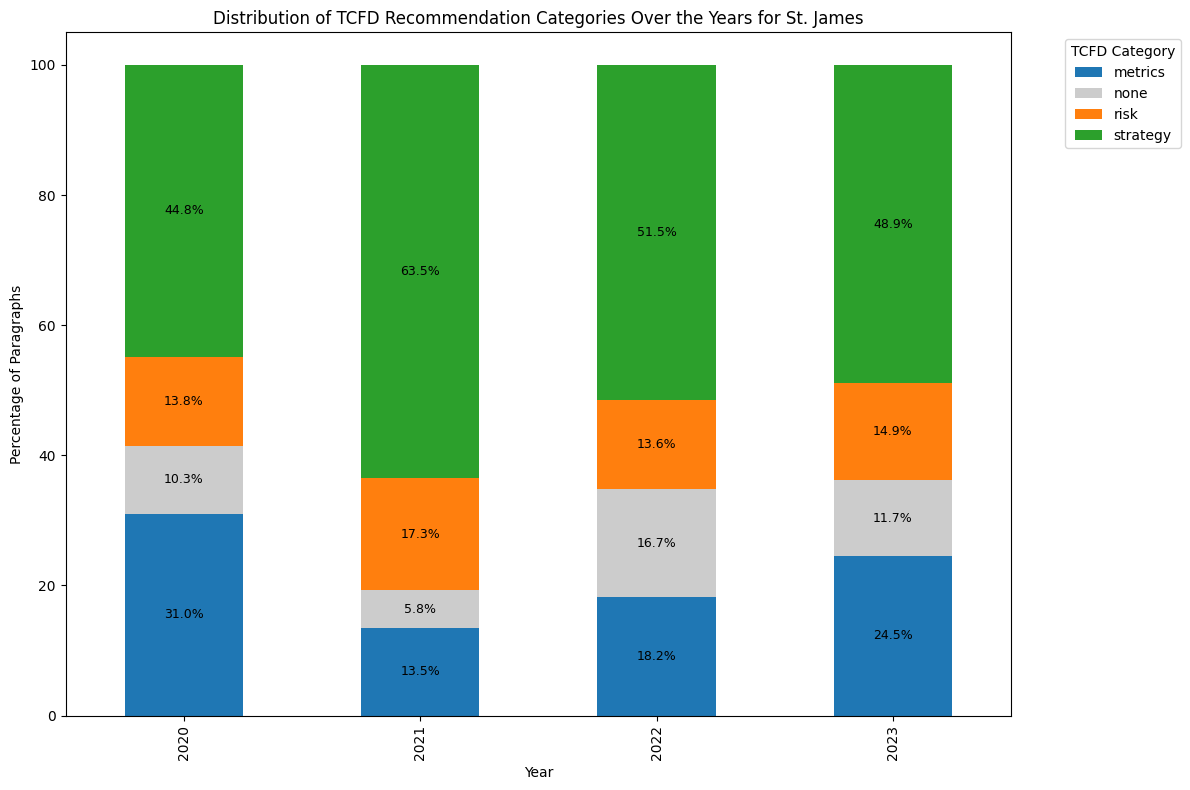

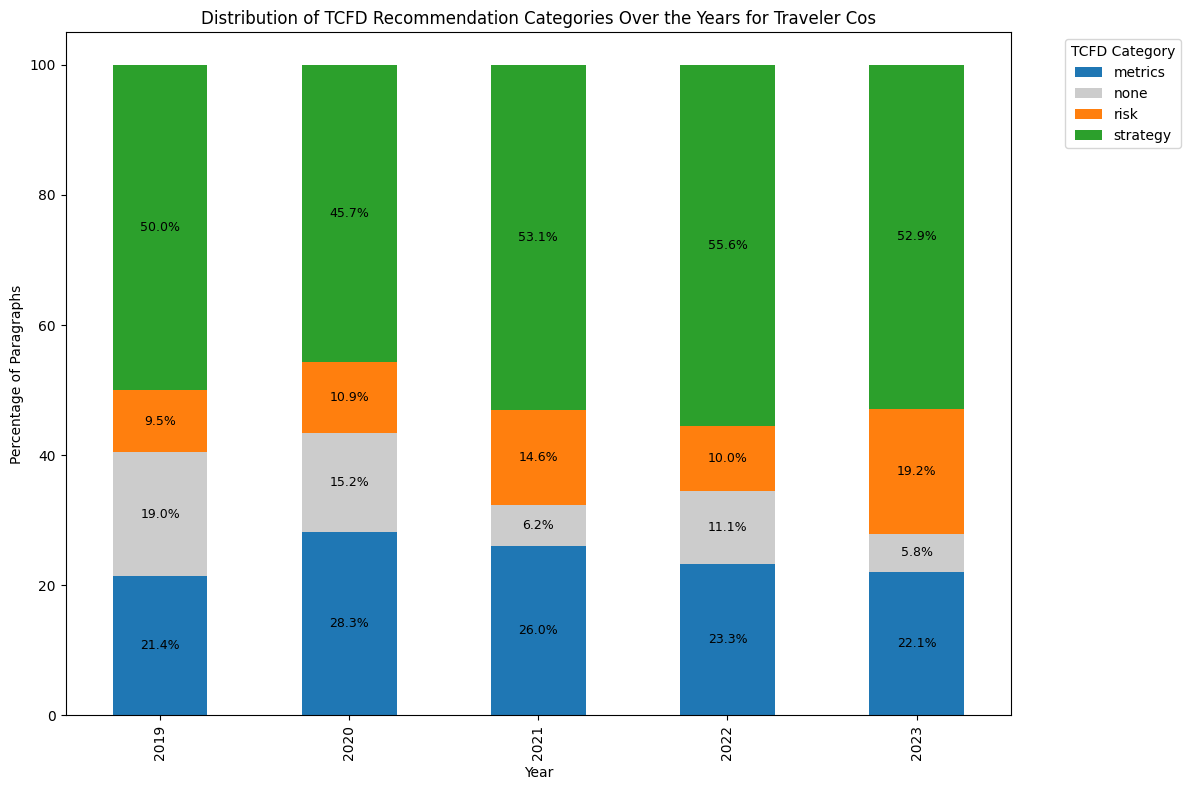

In [14]:
def plot_tcfd_distribution(df, company_name, colors):
    # Create a pivot table for plotting
    pivot_table = df.pivot_table(index='year', columns='tcfd_classification_label', aggfunc='size', fill_value=0)
    
    # Convert counts to percentages
    pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))
    pivot_table_percentage.plot(kind='bar', stacked=True, ax=ax, color=[colors[label] for label in pivot_table_percentage.columns])
    
    # Formatting
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of Paragraphs')
    ax.set_title(f'Distribution of TCFD Recommendation Categories Over the Years for {company_name}')
    ax.grid(False)  # Remove grid
    
    # Add percentage labels to the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=9, color='black')
    
    # Move the legend outside the plot
    ax.legend(title='TCFD Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Define a consistent color palette for TCFD categories
colors = {
    'none': '#cccccc',       # Light gray for 'none'
    'metrics': '#1f77b4',    # Blue
    'strategy': '#2ca02c',   # Orange
    'risk': '#ff7f0e',       # Green
    'governance': '#d62728'  # Red
}

# Plot for St. James
plot_tcfd_distribution(tcfd_st_james_df, "St. James", colors)

# Plot for Traveler Cos
plot_tcfd_distribution(tcfd_traveler_df, "Traveler Cos", colors)

### Percentage of Climate-Related Earnings Calls Texts Over the Years

This visualisation illustrates the percentage of climate-related paragraphs in Bloomberg earnings calls for St. James and Traveler Cos from 2019 onwards. The bars represent the proportion of climate-related text each year, with annotations showing the exact percentages. 

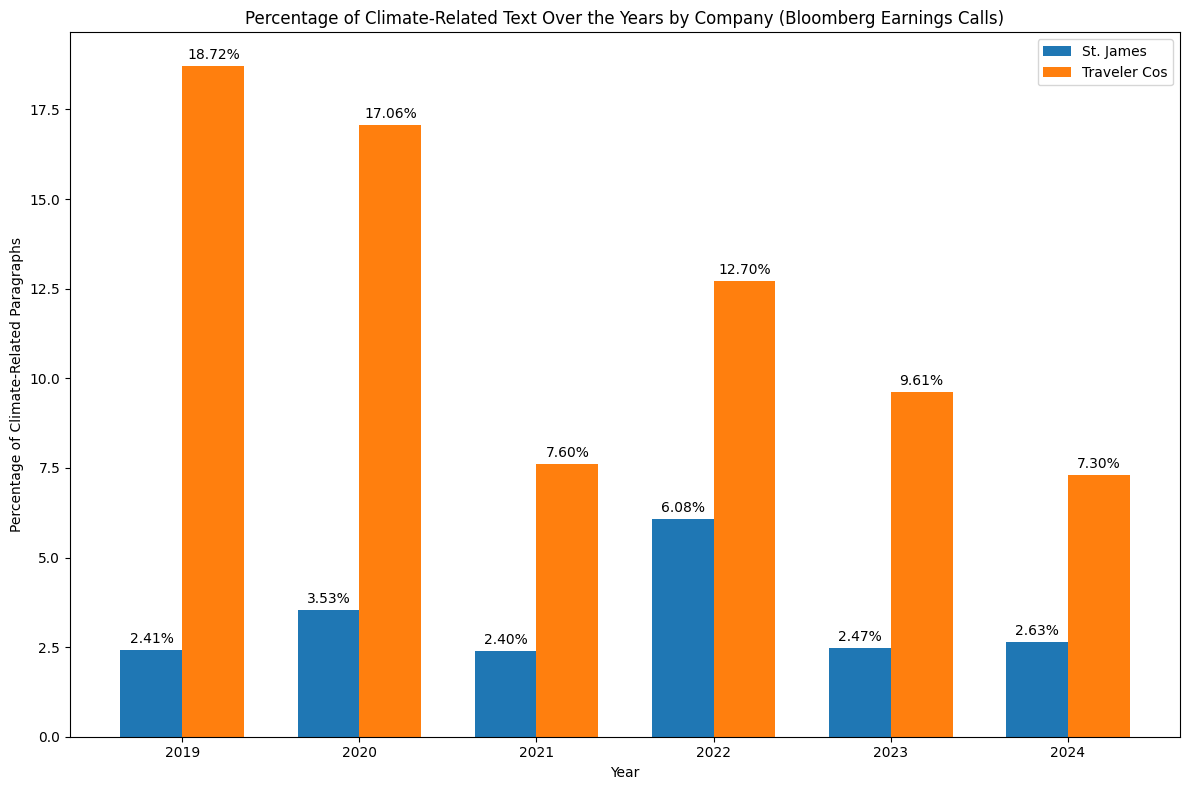

In [15]:
# Convert date to datetime to extract the year
earnings_st_james_df['date'] = pd.to_datetime(earnings_st_james_df['date'])
earnings_traveler_df['date'] = pd.to_datetime(earnings_traveler_df['date'])
earnings_st_james_yes_df['date'] = pd.to_datetime(earnings_st_james_yes_df['date'])
earnings_traveler_yes_df['date'] = pd.to_datetime(earnings_traveler_yes_df['date'])

earnings_st_james_df['year'] = earnings_st_james_df['date'].dt.year
earnings_traveler_df['year'] = earnings_traveler_df['date'].dt.year
earnings_st_james_yes_df['year'] = earnings_st_james_yes_df['date'].dt.year
earnings_traveler_yes_df['year'] = earnings_traveler_yes_df['date'].dt.year

# Calculate the total paragraphs per year
total_paragraphs_st_james = earnings_st_james_df.groupby('year').size().reset_index(name='total_paragraphs')
total_paragraphs_traveler = earnings_traveler_df.groupby('year').size().reset_index(name='total_paragraphs')

# Calculate the climate-related paragraphs per year
climate_paragraphs_st_james = earnings_st_james_yes_df.groupby('year').size().reset_index(name='climate_paragraphs')
climate_paragraphs_traveler = earnings_traveler_yes_df.groupby('year').size().reset_index(name='climate_paragraphs')

# Merge the dataframes
st_james_merged = pd.merge(total_paragraphs_st_james, climate_paragraphs_st_james, on='year', how='left').fillna(0)
traveler_merged = pd.merge(total_paragraphs_traveler, climate_paragraphs_traveler, on='year', how='left').fillna(0)

# Calculate the percentage of climate-related paragraphs
st_james_merged['percentage_climate_related'] = (st_james_merged['climate_paragraphs'] / st_james_merged['total_paragraphs']) * 100
traveler_merged['percentage_climate_related'] = (traveler_merged['climate_paragraphs'] / traveler_merged['total_paragraphs']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
years = st_james_merged['year']

# Bar positions
index = range(len(years))
bar1 = ax.bar(index, st_james_merged['percentage_climate_related'], bar_width, label='St. James')
bar2 = ax.bar([i + bar_width for i in index], traveler_merged['percentage_climate_related'], bar_width, label='Traveler Cos')

# Adding the percentage labels on top of the bars
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Customizing the plot
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Climate-Related Paragraphs')
ax.set_title('Percentage of Climate-Related Text Over the Years by Company (Bloomberg Earnings Calls)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()

### Sentiment Climate Distribution of Bloomberg Earnings Calls

The visualisations illustrate the sentiment distribution of climate-related paragraphs within Bloomberg earnings calls for St. James and Traveler Cos across different years. The pie charts display the proportion of paragraphs categorised as "neutral," "opportunity," and "risk" for each year. This analysis helps to understand the evolution of climate-related sentiment in the companies' earnings calls over time.

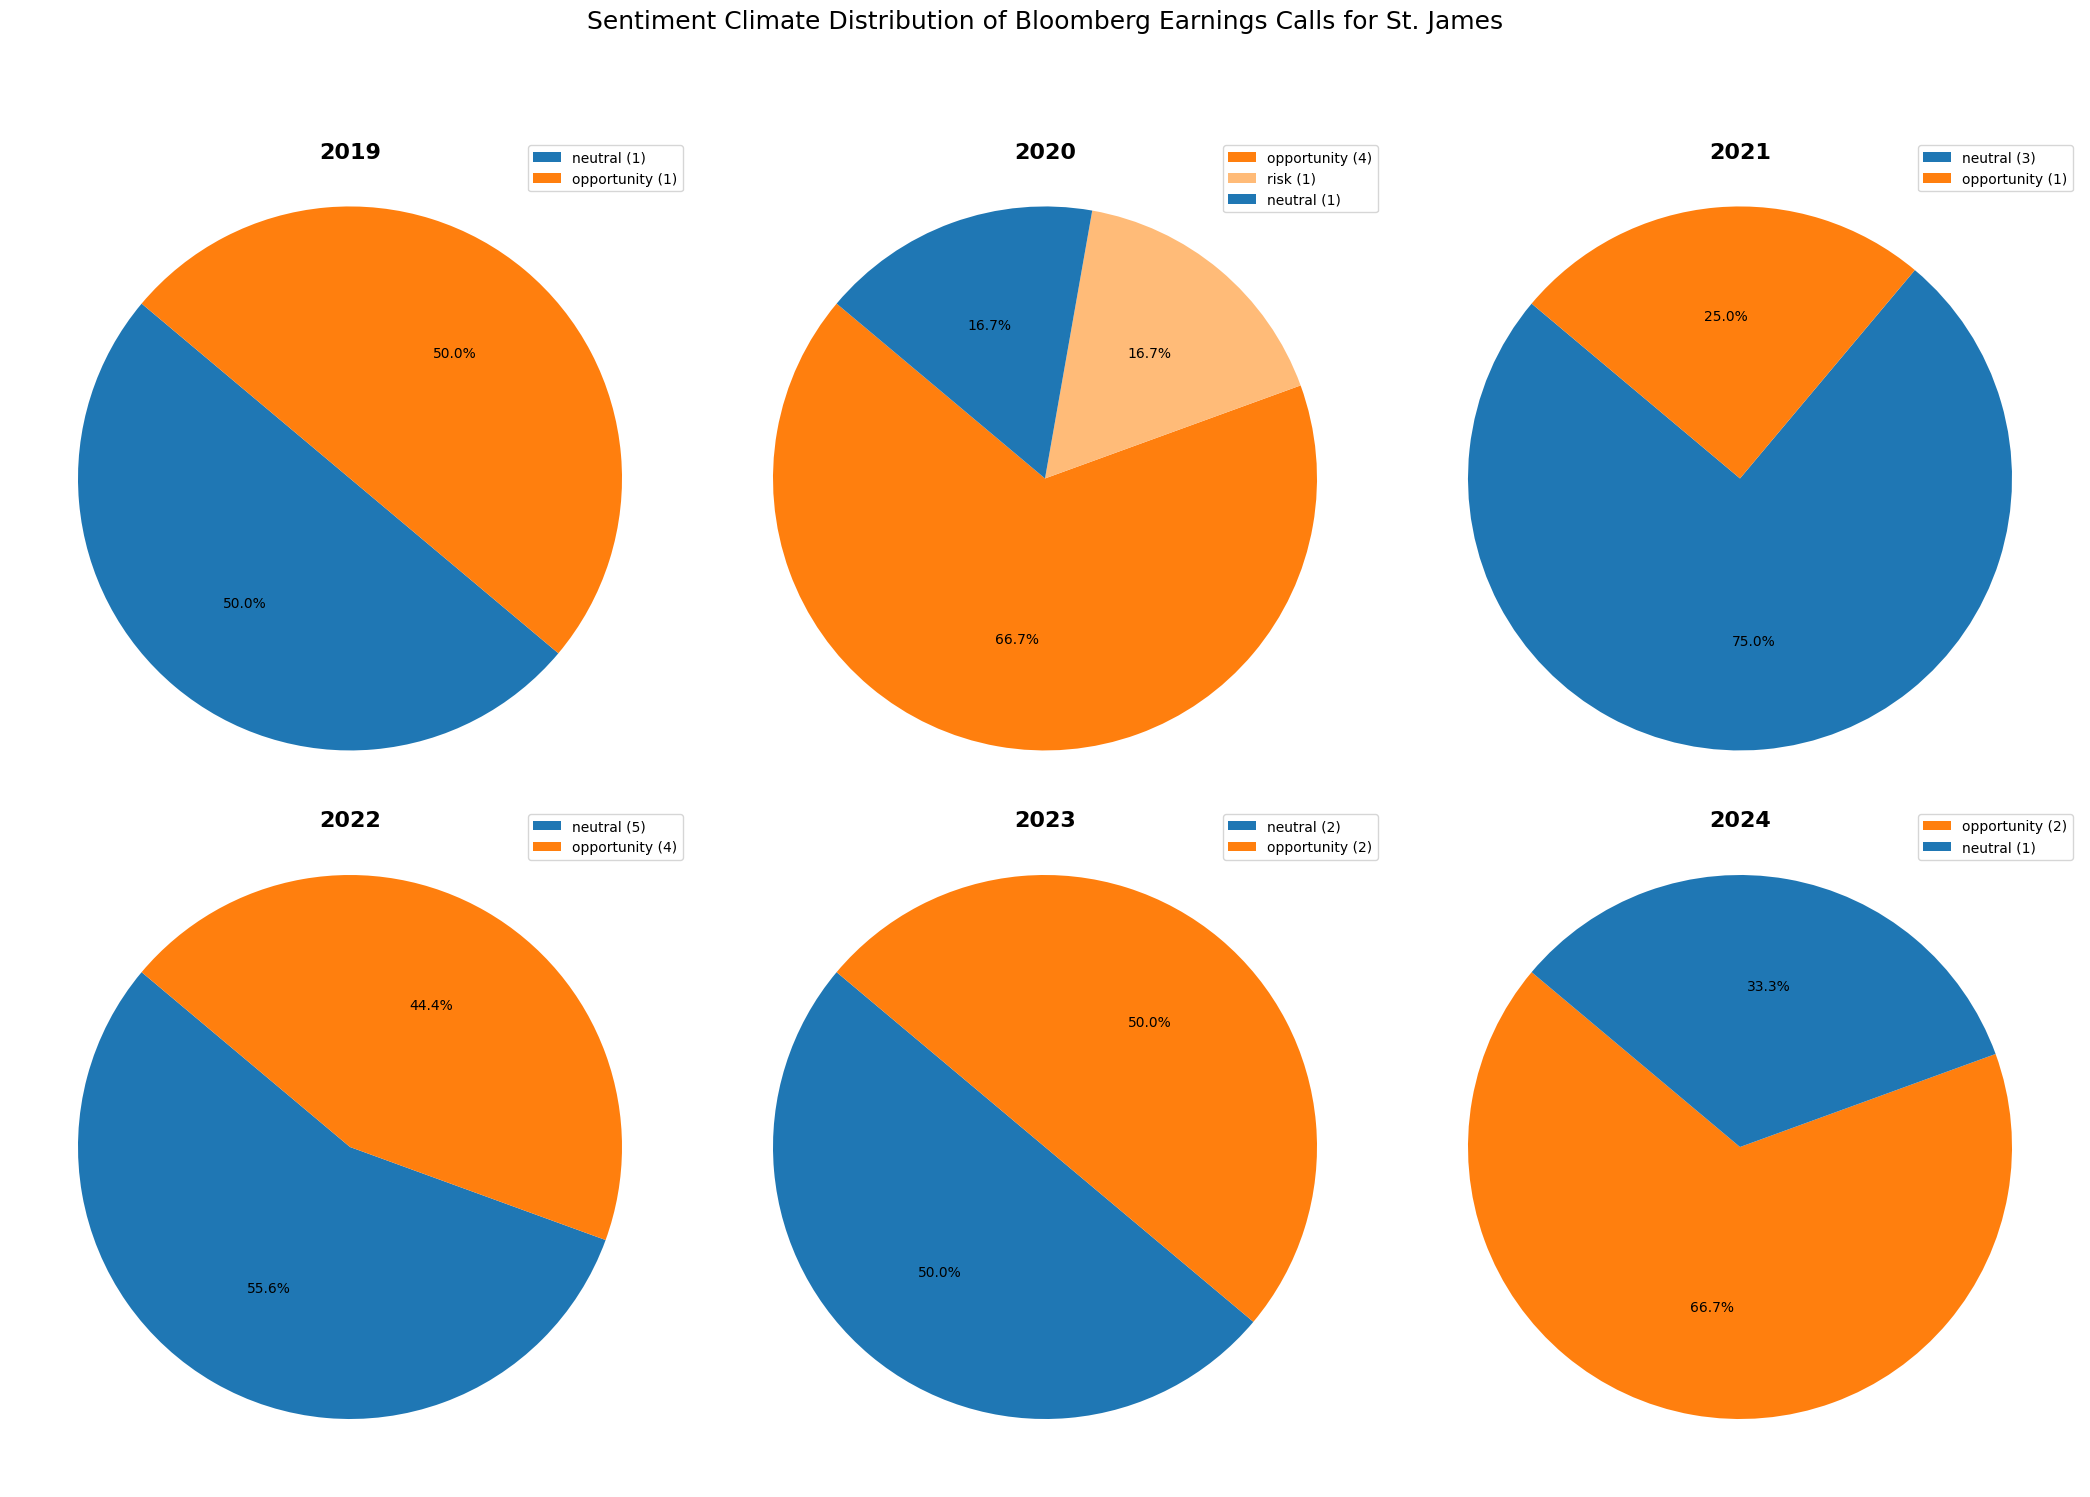

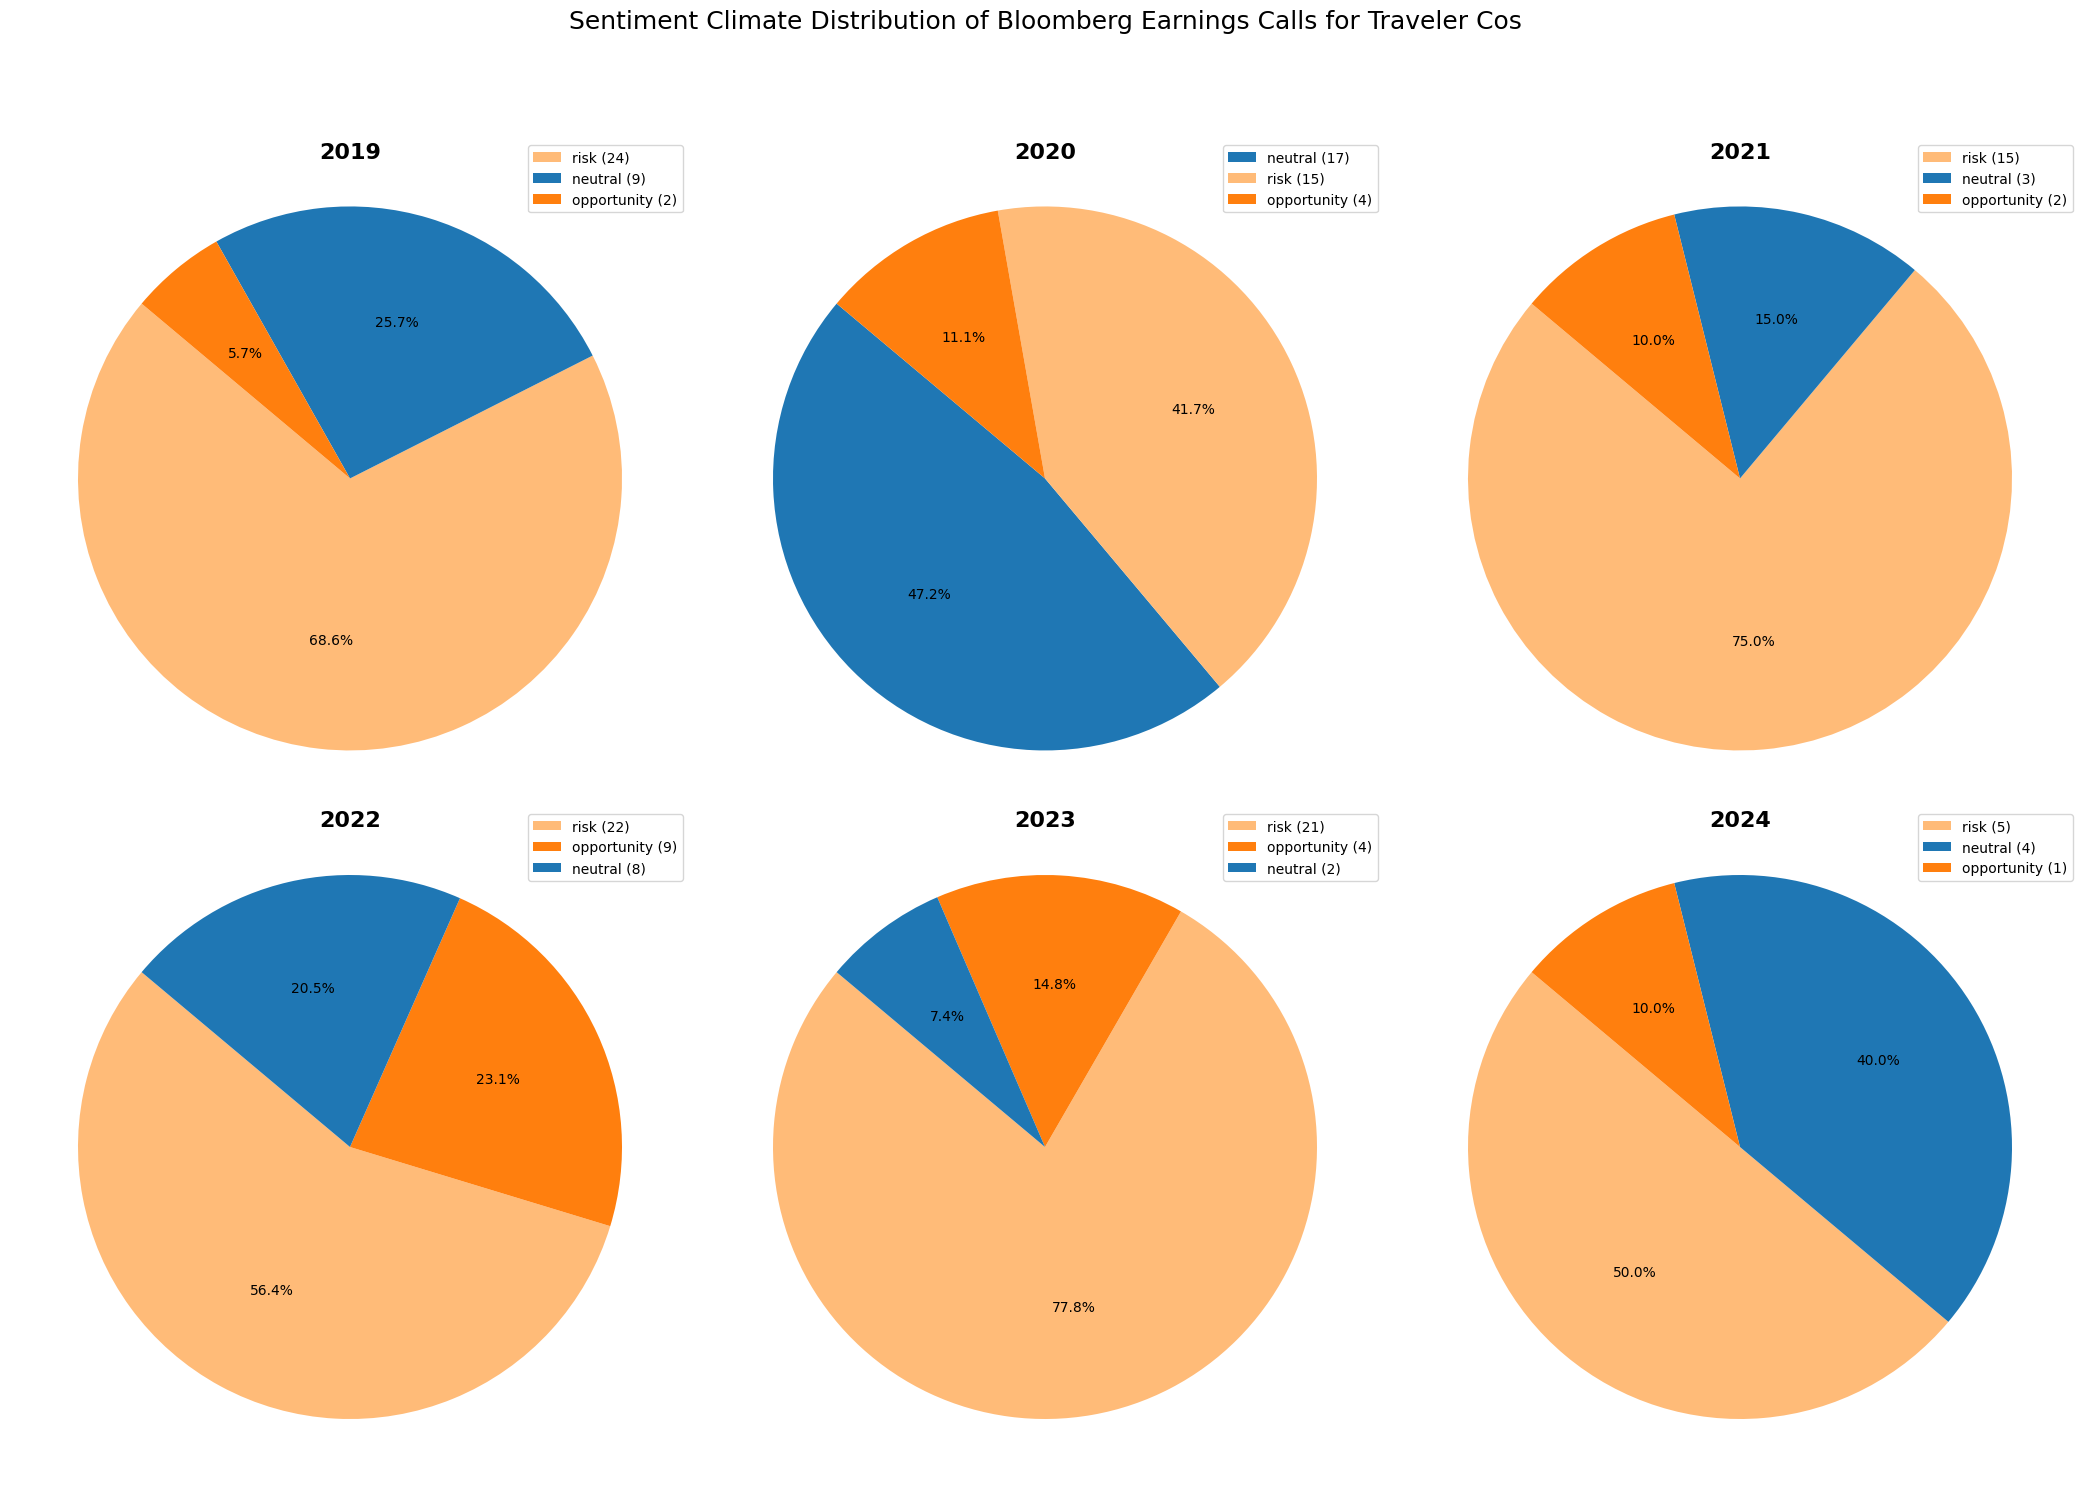

In [16]:
def plot_sentiment_pie_charts(df, company_name):
    # Extract year from date and add as a new column
    df['year'] = pd.to_datetime(df['date']).dt.year

    # Get the unique years
    years = sorted(df['year'].unique())

    # Determine grid layout
    n_years = len(years)
    cols = 3  # Number of columns per row
    rows = (n_years + cols - 1) // cols  # Calculate rows needed

    # Set up the plot grid
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 8))
    fig.suptitle(f'Sentiment Climate Distribution of Bloomberg Earnings Calls for {company_name}', fontsize=18)

    if rows * cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    # Define a custom color palette
    colors = {
        'neutral': '#1f77b4',     # Blue
        'opportunity': '#ff7f0e', # Orange
        'risk': '#ffbb78'         # Yellow
    }

    # Iterate through years and axes
    for ax, year in zip(axes, years):
        # Filter data for the specific year
        yearly_data = df[df['year'] == year]

        # Count occurrences of each sentiment label
        sentiment_counts = yearly_data['sentiment_label'].value_counts()

        # Plot the pie chart
        wedges, texts, autotexts = ax.pie(
            sentiment_counts,
            autopct='%1.1f%%',
            startangle=140,
            colors=[colors[label] for label in sentiment_counts.index]
        )

        # Add the year above the pie chart
        ax.text(0, 1.2, str(year), ha='center', va='center', fontsize=16, fontweight='bold')

        # Add labels outside the pie chart
        ax.legend(wedges, [f'{label} ({count})' for label, count in sentiment_counts.items()], loc='upper right')

    # Hide unused axes
    for ax in axes[n_years:]:
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot for St. James
plot_sentiment_pie_charts(earnings_st_james_yes_df, "St. James")

# Plot for Traveler Cos
plot_sentiment_pie_charts(earnings_traveler_yes_df, "Traveler Cos")

### Earnings Calls and TCFD Main Labels Over Time 

This visualisation highlights the most frequent sentiment labels from earnings calls and TCFD reports for St. James and Traveler Cos from 2019 onwards. Each point on the plot represents a sentiment label—neutral, opportunity, or risk—associated with the dates the earnings call transcripts got released. The vertical red dashed lines mark the years, with corresponding TCFD main labels provided, showcasing the company's focus. This view allows for a clear comparison between the TCFD strategies and the topics discussed during the earnings calls for each company. 

In [17]:
# Function to get the most frequent label for each file
def get_most_frequent_labels_with_date(df, label_col, file_col, date_col):
    most_frequent_labels = []

    # Iterate over each file
    for file_name in df[file_col].unique():
        file_df = df[df[file_col] == file_name]
        
        # Check if the DataFrame is empty
        if file_df.empty:
            continue
        
        # Extract the date information
        most_recent_date = file_df[date_col].max() if date_col in file_df.columns else None
        
        # Count occurrences of each label
        label_counts = file_df[label_col].value_counts()
        
        # Check if there are any labels counted
        if not label_counts.empty:
            # Get the most frequent label
            most_frequent_label = label_counts.idxmax()
            most_frequent_labels.append([file_name, most_recent_date, most_frequent_label, label_counts[most_frequent_label]])

    # Create DataFrame from the results
    most_frequent_labels_df = pd.DataFrame(most_frequent_labels, columns=[file_col, 'most_recent_date', 'most_frequent_label', 'count'])
    return most_frequent_labels_df

# Count sentiment labels for each file
earnings_st_james_most_frequent = get_most_frequent_labels_with_date(earnings_st_james_yes_df, 'sentiment_label', 'file_name', 'date')
earnings_traveler_most_frequent = get_most_frequent_labels_with_date(earnings_traveler_yes_df, 'sentiment_label', 'file_name', 'date')

# Count TCFD classification labels for each file
tcfd_st_james_most_frequent = get_most_frequent_labels_with_date(tcfd_st_james_df, 'tcfd_classification_label', 'file_name', 'year')
tcfd_traveler_most_frequent = get_most_frequent_labels_with_date(tcfd_traveler_df, 'tcfd_classification_label', 'file_name', 'year')


C:\Users\dimi3\AppData\Local\Temp\ipykernel_20724\1031849520.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col].astype(str) + '-01-01', utc=False)


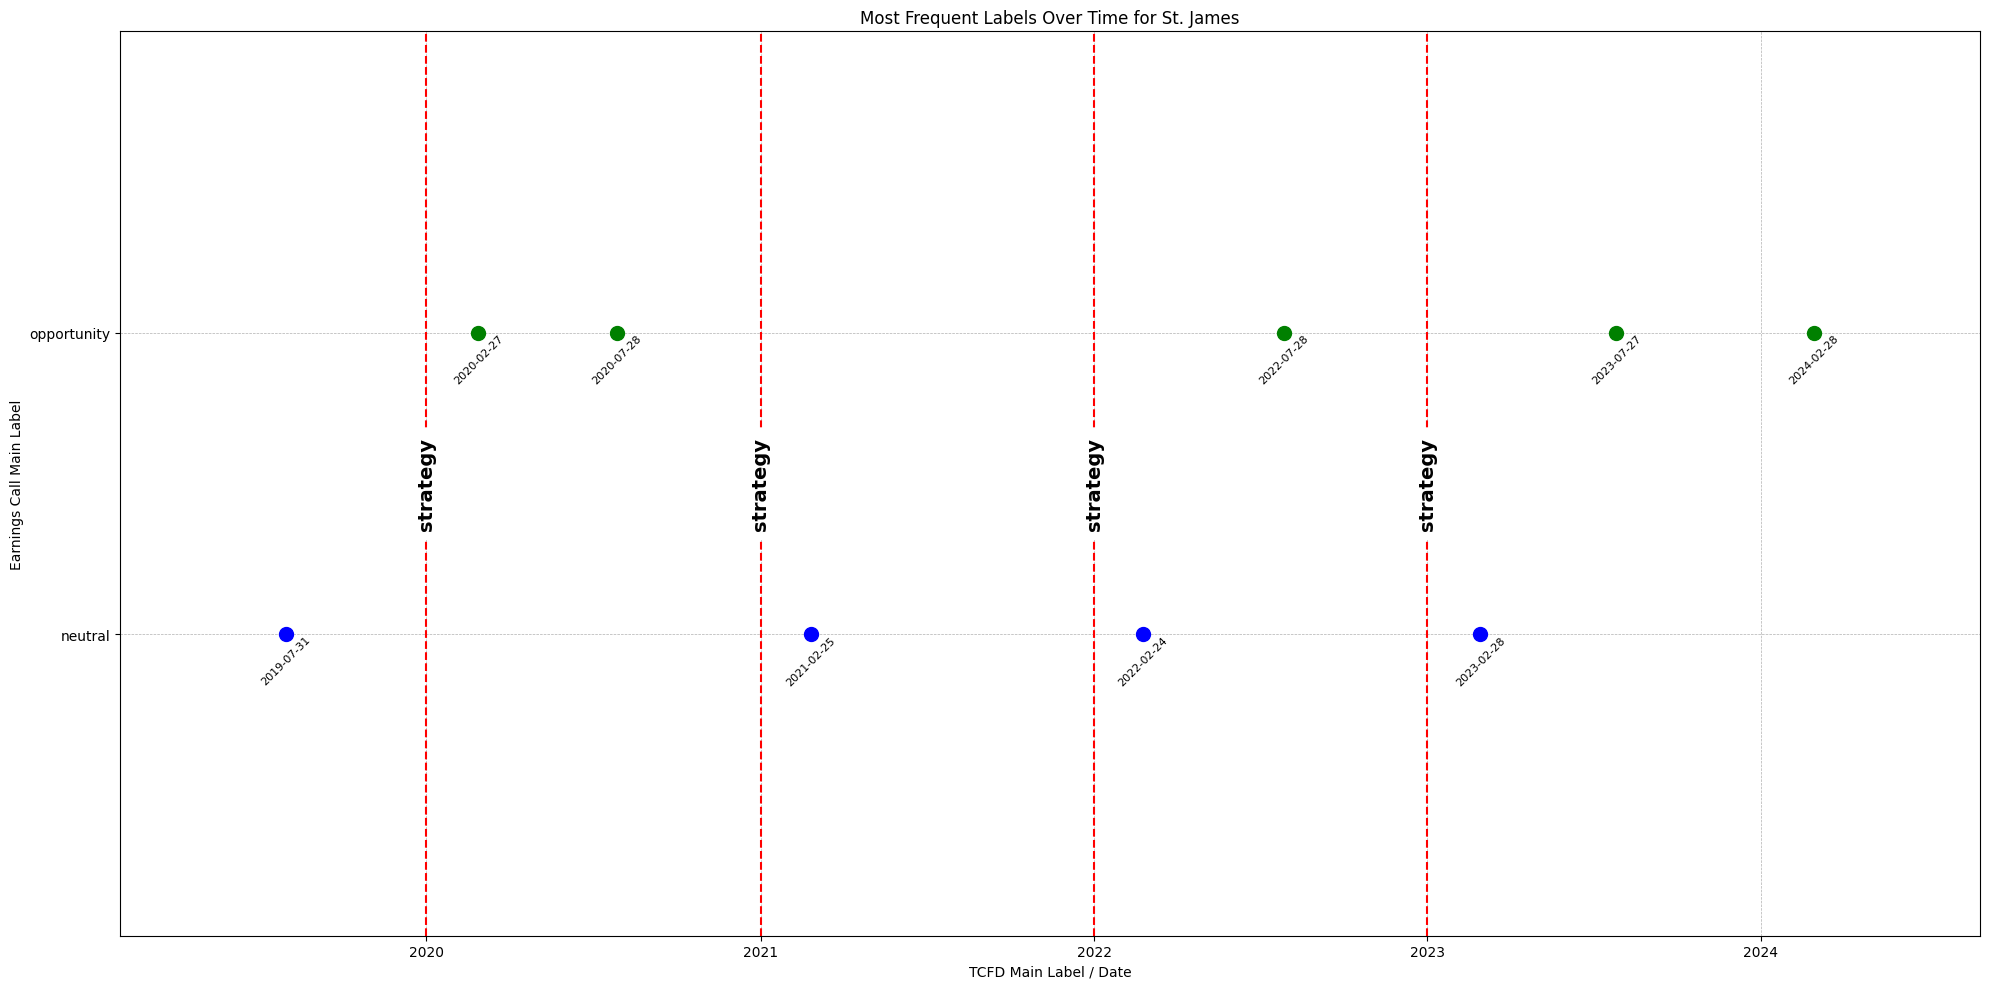

C:\Users\dimi3\AppData\Local\Temp\ipykernel_20724\1031849520.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col].astype(str) + '-01-01', utc=False)


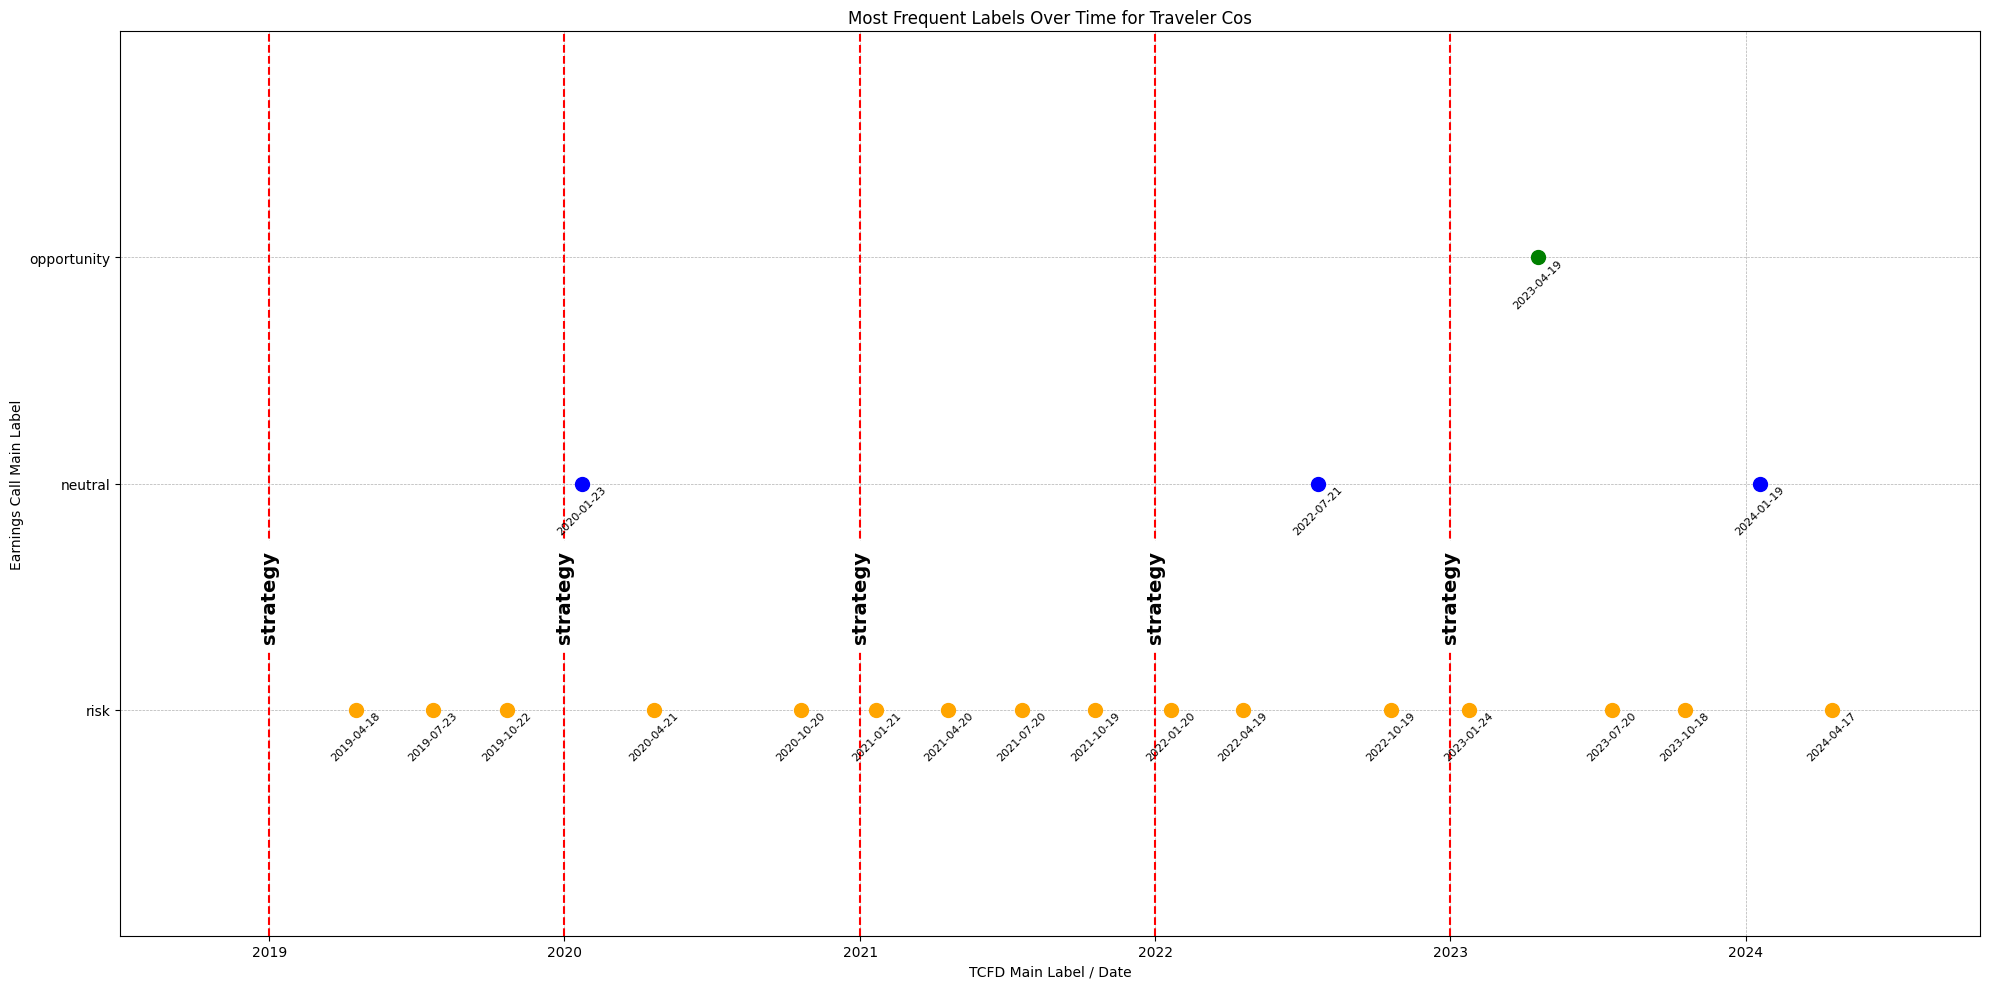

In [18]:
# Define color mapping for sentiment labels
label_color_mapping = {
    'neutral': 'blue',
    'opportunity': 'green',
    'risk': 'orange'
}

# Function to convert TCFD years to datetime
def convert_tcfd_date(df, date_col):
    df[date_col] = pd.to_datetime(df[date_col].astype(str) + '-01-01', utc=False)
    return df

# Function to ensure all dates are timezone-naive
def make_dates_timezone_naive(df, date_col):
    df[date_col] = df[date_col].dt.tz_localize(None)
    return df

# Function to plot the most frequent labels over time
def plot_labels_over_time(tcfd_data, earnings_data, company_name):
    fig, ax = plt.subplots(figsize=(20, 10))

    # Convert the 'most_recent_date' in TCFD data to datetime and ensure dates are timezone-naive
    tcfd_data = convert_tcfd_date(tcfd_data, 'most_recent_date')
    tcfd_data = make_dates_timezone_naive(tcfd_data, 'most_recent_date')
    earnings_data = make_dates_timezone_naive(earnings_data, 'most_recent_date')

    # Plot TCFD Labels
    for i, row in tcfd_data.iterrows():
        ax.axvline(x=row['most_recent_date'], color='red', linestyle='--')
        # Adjusting the text properties: rotation=90, fontsize=14, weight='bold', ha='center', va='center'
        ax.text(row['most_recent_date'], 0.5, row['most_frequent_label'], color='black', fontsize=14, weight='bold', ha='center', va='center', rotation=90, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))

    # Plot Earnings Calls
    for i, row in earnings_data.iterrows():
        label_color = label_color_mapping.get(row['most_frequent_label'], 'blue')
        ax.scatter(row['most_recent_date'], row['most_frequent_label'], color=label_color, label='Earnings Call', s=100, zorder=5)
        ax.text(row['most_recent_date'], row['most_frequent_label'], row['most_recent_date'].strftime("%Y-%m-%d"), color='black', fontsize=8, ha='center', va='top', rotation=45)

    # Formatting
    ax.set_xlabel('TCFD Main Label / Date')
    ax.set_ylabel('Earnings Call Main Label')
    ax.set_yticks(sorted(set(earnings_data['most_frequent_label'])))
    ax.set_yticklabels(sorted(set(earnings_data['most_frequent_label'])))
    ax.set_title(f'Most Frequent Labels Over Time for {company_name}')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Adjust y-limits to provide space for Earnings labels
    ax.set_ylim(-1, len(set(earnings_data['most_frequent_label'])))

    # Set x-limits based on the date range in the data
    min_date = min(tcfd_data['most_recent_date'].min(), earnings_data['most_recent_date'].min())
    max_date = max(tcfd_data['most_recent_date'].max(), earnings_data['most_recent_date'].max())
    ax.set_xlim(min_date - pd.DateOffset(months=6), max_date + pd.DateOffset(months=6))

    plt.tight_layout()
    plt.show()

# Convert 'most_recent_date' in TCFD DataFrames before plotting
tcfd_st_james_most_frequent = convert_tcfd_date(tcfd_st_james_most_frequent, 'most_recent_date')
tcfd_traveler_most_frequent = convert_tcfd_date(tcfd_traveler_most_frequent, 'most_recent_date')

# Plot for St. James
plot_labels_over_time(tcfd_st_james_most_frequent, earnings_st_james_most_frequent, "St. James")

# Plot for Traveler Cos
plot_labels_over_time(tcfd_traveler_most_frequent, earnings_traveler_most_frequent, "Traveler Cos")
